<h1 style="color:Green;">Week 1 Lab - Solutions</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/19UcHoIW3OC2Fd18_VkooiumdG5NtQpu-RoCgfz_I4nM/edit#slide=id.g11b032e97d3_0_0">[Week 1 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to perform Exploratory Data Analysis (EDA) on a multiple-asset portfolio</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

Months following the COVID-19 pandemic recovery, the stock market seems to slow down on its ralley and the cryptocurrency market continues to show volatility. As a quantitative analyst and an investor, you want to understand the empirical behaviors of the assets before building a predictive model and investing in them, since you believe that this can give you a statistical edge in your portfolio. You have several assets in mind and would like to conduct an initial analysis on their historical performances to see if they are a good makeup for your portfolio.<br><br>
Please complete the following problems to perform full EDA on your stock selection.

<h2 style="color:Green;">Problem 1: Preliminary Visualization</h2>

a) Select 3-5 assets of your prefernce, then specify their ticker(s), start and end dates of their price data you want to explore.<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

<b style="color:blue;"> Solution: </b>
<p style="color:blue;"> I specified stocks for Apple (AAPL), New York Times (NYT), and Wells Fargo (WFC), and got their data between 2012-05-01 and 2022-05-01. </p>

In [2]:
################ EDIT CODE LINE HERE #################

symbolList =  ['AAPL', 'NYT', 'WFC'] # asset ticker symbols 
START_DATE = '2012-05-01' # asset data start date 
END_DATE = '2022-05-01' # asset data end date

#####################################################

Run the following code chunk to extract the adjusted close prices and compute log returns of Apple's stock from Yahoo Finance.<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [3]:
stockPxList = pdr.DataReader(symbolList , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()

b) Please write a code piece to perform 2 visualizaitons on the assets' log returns you extracted from a). <br><br>
Since there are at least 3 assets, plots such as time plot, scatter plot, box plot, and histogram would have to be plotted more than once to evaluate each asset.

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> Visualization #1: Correlation Heatmap </p>

Text(0.5, 1.0, 'Correlations Between Stock Log Return')

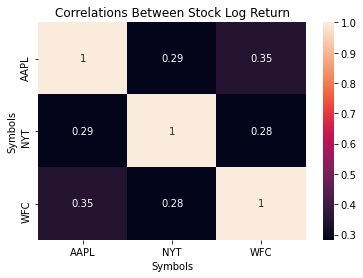

In [4]:
################ EDIT CODE LINE HERE #################

sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Return")

#####################################################

<p style="color:blue;"> Visualization #2: Histogram </p>

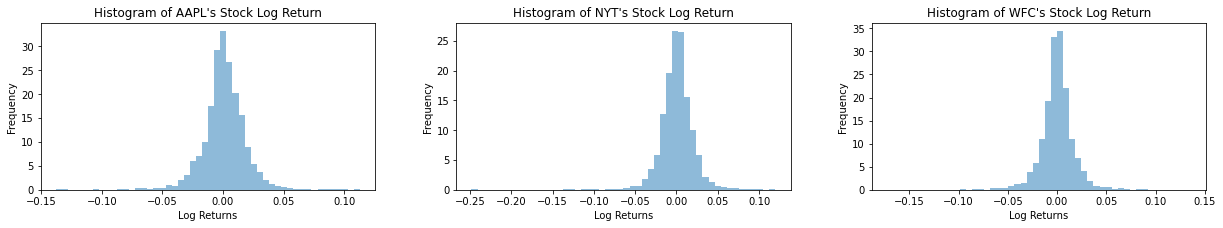

In [12]:
################ EDIT CODE LINE HERE #################
fig, axs = plt.subplots(1, 3, figsize=(18,4))
fig.tight_layout(pad=5)

for i in range(len(symbolList)):
    axs[i].hist(stockLogRetList[symbolList[i]], bins=50, density=1, alpha=0.5)
    axs[i].set_title("Histogram of " + symbolList[i] + "'s Stock Log Return")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Frequency')

#####################################################

c) Interpret the visualizations that you performed above. What can you say about them?

<b style="color:blue;"> Solution: </b>

<p style="color:blue;"> From the correlation heatmap, the 3 stocks have low correlation of around 0.3. This means that it is safe to hold all them simultaneously because a drawdown of one stock would tend not to correlate to the drawdown of the other stocks.
<br><br>
From the histograms, AAPL and WFC's log return seems to be centered at around 0, with tail values slightly skewed to the left, but looks roughly symmetric overall; NYT's log return seems to be centered at around 0, with the losses extending far out to the left to around the -0.25 extreme, which can be potential outliers. As a more conservative investor, I am comfortable holding just AAPL and WFC but not NYT because of its extreme losses. What type of investor are you?
<br><br>
A box plot or a summary statistics table can be used to further examine the distribution of log returns.</p>

<h2 style="color:Green;">Problem 2: Preliminary Normality Testing</h2>

You realized that within the date range you specified, there may be some days when the assets make big directional swings, hence skewing the data or thickening the probabilities of extreme values. To keep your minds in peace, you decided to perform normality testing to understand how your assets' distribution compare to what's condered 'normal'.<br><br>
(e.g., If your date range spans the COVID-19 pandemic, you may see more extreme tail values or outliers in your log returns, which deviates from a normal distribution because the market fluctuates a lot during this time.)<br><br>
a) Please write a code piece to perform 1 normality test on the assets' returns you extracted from problem 1.

<b style="color:blue;"> Solution: </b>

In [18]:
################ EDIT CODE LINE HERE #################

{s:stats.shapiro(stockLogRetList[s]).pvalue for s in symbolList}

#####################################################

{'AAPL': 2.2150445432135037e-32,
 'NYT': 1.5823078415480487e-36,
 'WFC': 2.5083102381567793e-40}

b) Interpret the result you obtained from the normality test you chose in part a). What can you say about it?

<b style="color:blue;"> Solution: </b>

<p style="color:blue;">   The test returns a p-value of 2.22*10^-32 for AAPL, 1.58*10^-36 for NYT, and 2.51*10^-40 for WFC log returns; These p-values have more than 30 decimal places to the left and are smaller than the 0.05 benchmark.
We would reject the null hypotheses, and conclude that AAPL, NYT, and WFC's log return comes from a non-normal distribution, individually.</p>

<h2 style="color:Green;">Problem 3: Preliminary Pre-processing </h2>

Imbalanced labels is a classification predictive modeling problem where the distribution of examples across the classes is not equal. For example, we may collect measurements of cats and have 80 samples of one cat species and 20 samples of a second cat species. This represents an example of an imbalanced classification problem. A 50-50 or a near-50-50 sample species would form a balanced classification problem.<br/>

As a quantitative analyst, you are curious as to how the list of assets you chose above helps predict the direction of another asset. But before diving into the modeling portion, you want to investigate any label imbalance problems. <br>

Please read this blog before jumping into this question: https://machinelearningmastery.com/what-is-imbalanced-classification/

a) Specify the ticker of the asset whose direction you are interested in predicting. This stock shall be different than the ones you chose in problem 1.

<b style="color:blue;"> Solution: </b>

In [19]:
SYMBOL = 'UNH' # asset ticker symbol

Run the following code chunk. This will binarize the returns for the asset that you're trying to predict over the period specified above. In other words, the asset's price will be transformed into 0's and 1's - 0 if price did not go up, 1 if price went up. A bar plot is produced to show the label distribution. For instance, there should be one bar showing how many days the stock goes up and another showing how many days the stock goes down.<br/>

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

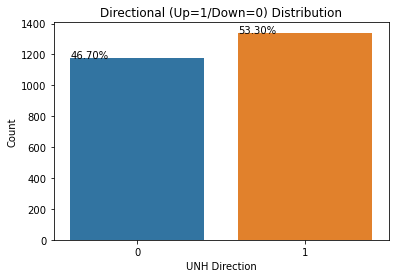

In [20]:
FEATURES = symbolList.copy()
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
# visualize directional label distribution
ax = sns.countplot(x = stockPx01)
plt.title('Directional (Up=1/Down=0) Distribution')
plt.xlabel(SYMBOL + ' Direction')
plt.ylabel('Count')
total = len(stockPx01)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

b) Are the lables balanced or imbalanced? Why?<br/>

<b style="color:blue;"> Solution: </b>

<p style="color:blue;">  The directional labels of UNH's stock seems well-balanced because log return is positive (up) 46.7%  and negative (down) 53.5% of the time. This nearly a 50-50 minority-to-majority class and can contribute to being an unbiased data set for our model later on.</p>

c) How do you think they can affect our prediction? (Hint: think about what the training data will look like)

<b style="color:blue;"> Solution: </b>

<p style="color:blue;">  The training data is expected to contain well-balanced stock classes, with the counts of 0 labels being close to the count of 1 labels. This allows our prediction to become less biased towards the majority class. </p>

d) Please suggest one way to handle imbalanced data?

<b style="color:blue;"> Solution: </b>

<p style="color:blue;">  Synthetic Minority Over-sampling Technique (SMOTE) or a combination of itself plus undersampling of the majority class. </p>

e) What is are the features in this problem? 

<b style="color:blue;"> Solution: </b>

<p style="color:blue;">  The features are AAPL, NYT, and WFC's daily log returns between 2012-05-01 and 2022-05-01.  </p>

f) Please write a one-line code to split the data into 80% training set and 20% testing set.

<b style="color:blue;"> Solution: </b>

In [25]:
################ EDIT CODE LINE HERE #################

X_train, X_test, y_train, y_test = train_test_split(stockLogRetList, stockPx01, test_size=0.2, random_state=0)

################ EDIT CODE LINE HERE #################

g) Please write a code piece to visualize the feature importance ranking of with a bar plot. How are the features ranked by their importance scores?<br><br> 
(Hint: you would need to split the data first in part e) before computing the importance scores here)

<b style="color:blue;"> Solution: </b>

Text(0.5, 0, 'Relative Importance')

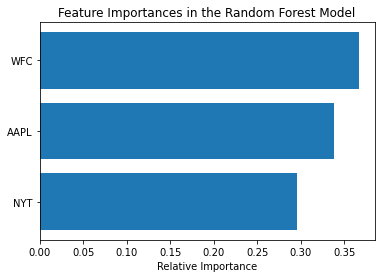

In [26]:
################ EDIT CODE LINE HERE #################

from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

# visualizing importance scores by features (ranked)
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

################ EDIT CODE LINE HERE #################

<p style="color:blue;">  The features are ranked from WFC's log return being the most important, followed by NYT's log return, then WFC's daily log return in predicting the direction of UNH's log return.</p>